In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Define the patient data path
PATIENT_PATH = "C:/Users/pasup/projects/Healthcare-Predictive-Pipeline/Data/Cleaned_Data/cleaned_healthcare_dataset.csv"

In [8]:
patient_df = pd.read_csv(PATIENT_PATH)

In [9]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.3

In [12]:
patient_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Aaron Adams,38,Female,O-,Cancer,2021-03-10,Norma Li,Hart LLC,UnitedHealthcare,26052.11,363,Elective,2021-03-29,Lipitor,Inconclusive
1,Aaron Aguirre,36,Male,A-,Diabetes,2023-02-26,Katrina Luna,Murray-Shelton,UnitedHealthcare,27087.56,300,Emergency,2023-03-13,Aspirin,Inconclusive
2,Aaron Anderson,50,Female,A+,Asthma,2020-12-18,Kenneth Jennings,Tanner-Cox,Cigna,39804.66,196,Urgent,2021-01-15,Aspirin,Inconclusive
3,Aaron Anderson Md,20,Female,A-,Hypertension,2021-03-28,Tammy Perez,Ritter LLC,UnitedHealthcare,16846.42,249,Elective,2021-04-09,Paracetamol,Abnormal
4,Aaron Archer,47,Female,B-,Cancer,2021-01-10,Cynthia Villanueva,Montes Case and Mendez,Medicare,10602.08,108,Urgent,2021-01-17,Paracetamol,Inconclusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Zoe Black,77,Female,A-,Diabetes,2022-09-24,Robert Nguyen,Lawrence and Bean Barton,Blue Cross,21654.26,247,Elective,2022-10-01,Penicillin,Abnormal
54962,Zoe Jackson,38,Male,A-,Asthma,2021-07-25,Andrew Hall,Jones PLC,Aetna,16668.26,476,Urgent,2021-07-30,Aspirin,Inconclusive
54963,Zoe Rodriguez,53,Female,O+,Cancer,2024-03-22,David Keller,Jones Ltd,Medicare,9024.09,178,Elective,2024-04-08,Penicillin,Inconclusive
54964,Zoe Smith,36,Male,AB-,Obesity,2022-02-24,Mary Bates,Inc Morales,Aetna,33252.23,272,Emergency,2022-03-15,Penicillin,Inconclusive


In [ ]:
# Converting 'Admission_Date' and 'Discharge_Date' to datetime format
patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

In [16]:
patient_df['Length of Stay'] = (patient_df['Discharge Date'] - patient_df['Date of Admission']).dt.days

In [17]:
patient_df["Date of Admission"].sort_values(ascending=True)

49152   2019-05-08
51991   2019-05-08
19117   2019-05-08
19114   2019-05-08
47334   2019-05-08
           ...    
50158   2024-05-07
27664   2024-05-07
23909   2024-05-07
19666   2024-05-07
46381   2024-05-07
Name: Date of Admission, Length: 54966, dtype: datetime64[ns]

In [18]:
print(patient_df["Date of Admission"].sort_values(ascending=True).nunique())

1827


In [ ]:
# Daily Granularity check for date range
(pd.to_datetime("2024-05-07") - pd.to_datetime("2019-05-08")).days

1826

#### Focus on Patient Details (Name, Age, Gender, Blood)

**Question: Which medical conditions have the highest proportion of Abnormal or Inconclusive tests?**

In [20]:
# Insight: The medical condition does not influence test results because the data shows near-perfect statistical independence
patient_df.groupby("Medical Condition")['Test Results'].value_counts(normalize = True).unstack().round(2)

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,0.34,0.33,0.33
Asthma,0.33,0.33,0.34
Cancer,0.34,0.33,0.33
Diabetes,0.34,0.33,0.33
Hypertension,0.33,0.34,0.34
Obesity,0.34,0.33,0.33


Text(0.5, 1.0, 'Test Results Distribution by Medical Condition')

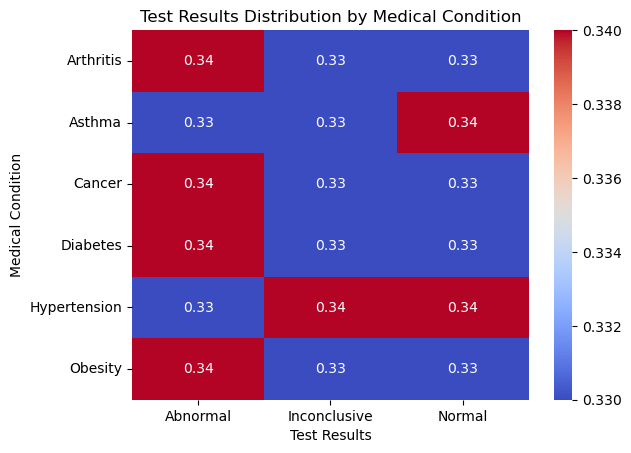

In [33]:
import seaborn as sns
heatmap_data = patient_df.groupby("Medical Condition")['Test Results'].value_counts(normalize = True).unstack().round(2)
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm").set_title("Test Results Distribution by Medical Condition")


**Does Age or Gender correlate with worse outcomes (Test Results)?**

In [23]:
# All the variable are categorical

# Mapping Test Results to numerical values
test_result_mapping = {'Normal': 0, 'Inconclusive': 1, "Abnormal": 2}
patient_df["Test Results Numeric"] = patient_df["Test Results"].map(test_result_mapping)

# Binning Age into categories
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
patient_df['Age Group'] = pd.cut(patient_df['Age'], bins = age_bins, labels = age_labels)

C:\Users\pasup\AppData\Local\Temp\ipykernel_40088\3036953612.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Test Results Numeric', hue ="Gender", data=patient_df, ci = None)


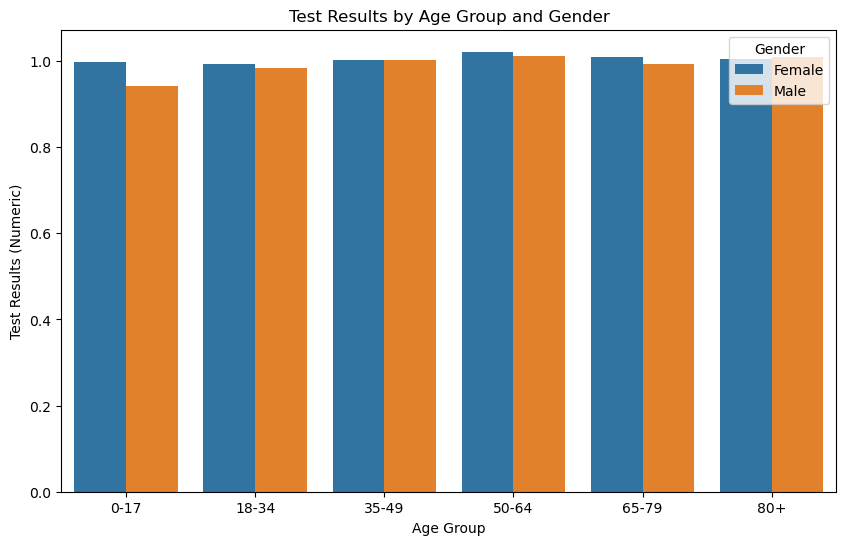

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='Age Group', y='Test Results Numeric', hue ="Gender", data=patient_df, ci = None)
#sns.barplot(data=prop_data, x='Age_Group', y='Proportion', hue='Test Results', ci=None)
plt.title('Test Results by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Test Results (Numeric)')
plt.show()

C:\Users\pasup\AppData\Local\Temp\ipykernel_40088\1374877011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = patient_df.groupby(['Age Group', 'Gender', 'Test Results']).size().reset_index(name='Count')
C:\Users\pasup\AppData\Local\Temp\ipykernel_40088\1374877011.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts['Proportion'] = counts.groupby(['Age Group', 'Gender'])['Count'].transform(lambda x: x / x.sum())
C:\Users\pasup\AppData\Local\Temp\ipykernel_40088\1374877011.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cou

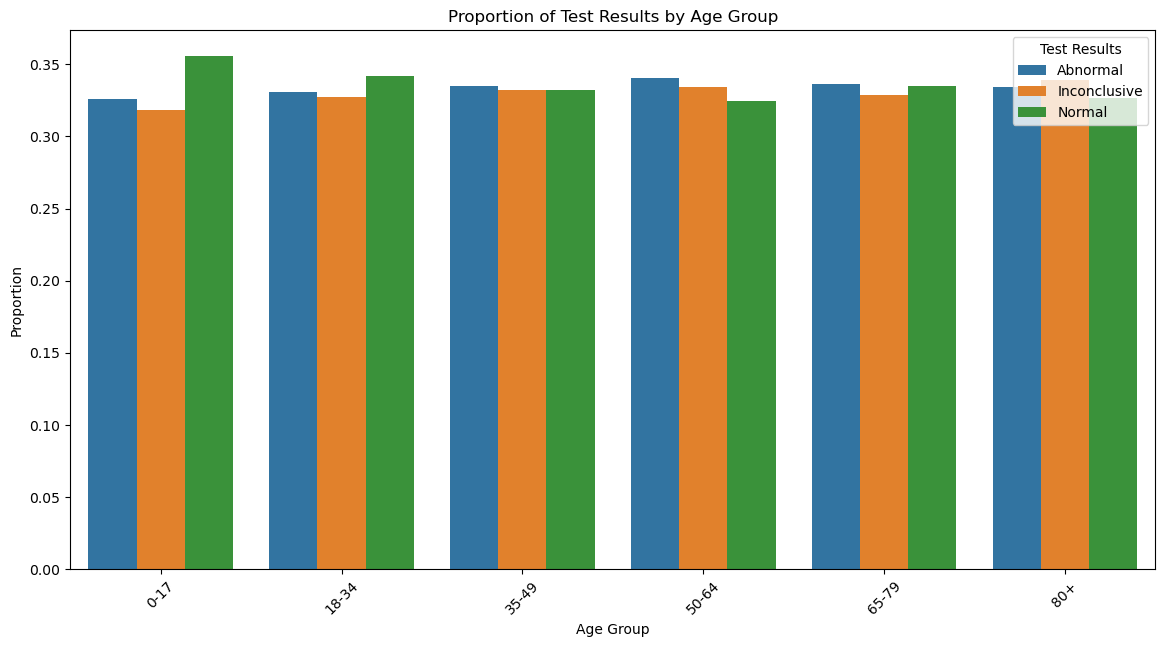

In [32]:
counts = patient_df.groupby(['Age Group', 'Gender', 'Test Results']).size().reset_index(name='Count')

# Calculate proportions per Age Group and Gender
counts['Proportion'] = counts.groupby(['Age Group', 'Gender'])['Count'].transform(lambda x: x / x.sum())

# Now you can plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(data=counts, x='Age Group', y='Proportion', hue='Test Results', ci=None)
plt.title('Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()


**Are Emergency admissions associated with poorer test results than Elective or Urgent?**


In [34]:
patient_df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay', 'Test Results Numeric',
       'Age Group'],
      dtype='object')

In [36]:
patient_df['Admission Type'].value_counts()    

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

- Emergency: Unplanned and requires immediate care
- Urgent: Unplanned, but can tolerate a short delay
- Elective: Scheduled beforehand

In [38]:
patient_df['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

C:\Users\pasup\AppData\Local\Temp\ipykernel_40088\1237938331.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= adm_counts, x='Admission Type', y='Proportion', hue='Test Results', ci=None)


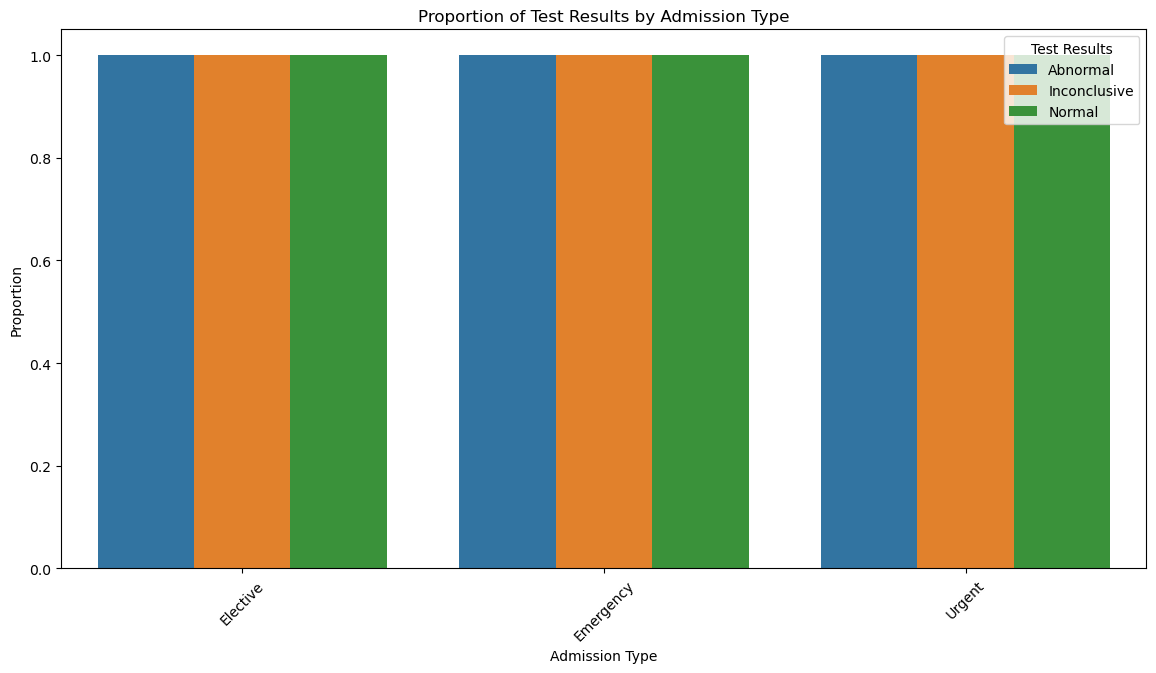

In [40]:
adm_counts = patient_df.groupby(['Admission Type', 'Test Results']).size().reset_index(name='Adm Count')

# Calculate proportions per Admission Type
adm_counts['Proportion'] = adm_counts.groupby(['Admission Type', 'Test Results'])['Adm Count'].transform(lambda x: x / x.sum())

# Now you can plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(data= adm_counts, x='Admission Type', y='Proportion', hue='Test Results', ci=None)
plt.title('Proportion of Test Results by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()


In [ ]:
prop_df = (
    patient_df
    .groupby(['Admission Type', 'Test Results'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name='Proportion')
)

ValueError: cannot insert Admission Type, already exists
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output setti

ValueError: cannot insert Admission Type, already exists

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pivot = prop_df.pivot(
    index='Admission Type',
    columns='Test Result',
    values='Proportion'
)

pivot = pivot[['Normal', 'Inconclusive', 'Abnormal']]  # story order

ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

ax.set_ylabel("Proportion of Tests")
ax.set_xlabel("")
ax.set_title("Test Result Distribution by Admission Type", fontsize=13)

ax.legend(title="Test Result", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.ylim(0,1)
plt.tight_layout()
plt.show()


NameError: name 'prop_df' is not defined